In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('data/train.csv', parse_dates=['date'], index_col='date').dropna()
df

,id,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature
date,,,,,,,,
2016-07-01 00:00:00,0,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,1,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,2,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,3,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,4,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...,...
2018-05-01 22:45:00,64315,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
2018-05-01 23:00:00,64316,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
2018-05-01 23:15:00,64317,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000


In [6]:
df.drop(columns='id', inplace=True)

In [7]:
df

,feature_AA,feature_AB,feature_BA,feature_BB,feature_CA,feature_CB,Temperature
date,,,,,,,
2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000
2016-07-01 00:15:00,5.760,2.076,1.492,0.426,4.264,1.401,30.459999
2016-07-01 00:30:00,5.760,1.942,1.492,0.391,4.234,1.310,30.038000
2016-07-01 00:45:00,5.760,1.942,1.492,0.426,4.234,1.310,27.013000
2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001
...,...,...,...,...,...,...,...
2018-05-01 22:45:00,12.458,1.407,7.889,-0.746,4.843,1.523,10.622000
2018-05-01 23:00:00,14.200,1.541,9.310,0.284,4.752,1.249,10.482000
2018-05-01 23:15:00,12.659,1.474,7.924,-0.959,4.569,1.310,10.271000


<Axes: xlabel='date'>

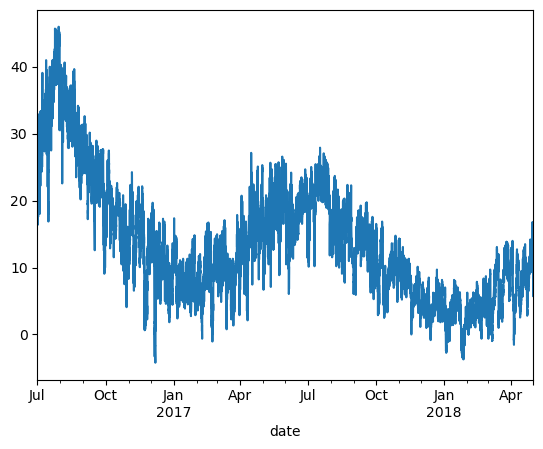

In [10]:
temp = df.Temperature
temp.plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
adfuller(temp)[1]

0.0012137779642670341

In [14]:
temp

date
2016-07-01 00:00:00    30.531000
2016-07-01 00:15:00    30.459999
2016-07-01 00:30:00    30.038000
2016-07-01 00:45:00    27.013000
2016-07-01 01:00:00    27.787001
                         ...    
2018-05-01 22:45:00    10.622000
2018-05-01 23:00:00    10.482000
2018-05-01 23:15:00    10.271000
2018-05-01 23:30:00    10.341000
2018-05-01 23:45:00    10.833000
Name: Temperature, Length: 64320, dtype: float64

### AR model

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [15]:
ar_model = ARIMA(temp, order=(2, 0, 0))

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)


In [16]:
ar_model_fit = ar_model.fit()

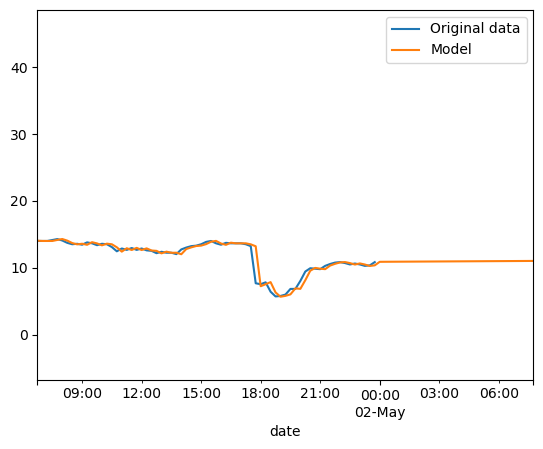

In [42]:
temp.plot(label='Original data')
ar_preds = ar_model_fit.predict(0, 65000)
ar_preds.plot(label='Model')

plt.xlim(ar_preds.index[-750], ar_preds.index[-650])  
# Set the limit based on the range of dates in your predictions

plt.legend()

### MA model

In [43]:
ma_model = ARIMA(temp, order=(0, 0, 6))
ma_model_fit = ma_model.fit()

/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15T will be used.
  self._init_dates(dates, freq)
/home/kuba/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


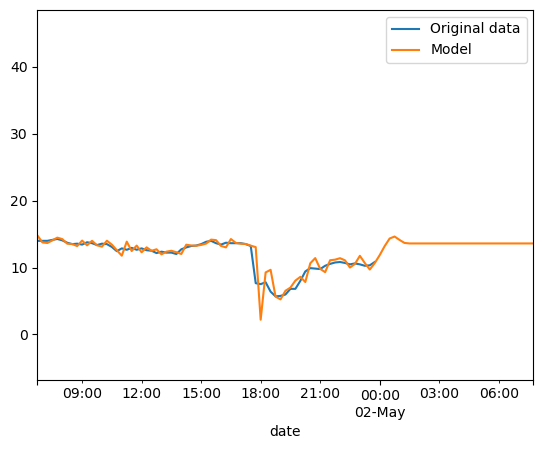

In [44]:
temp.plot(label='Original data')
ma_pred = ma_model_fit.predict(0, 65000)
ma_pred.plot(label='Model')
plt.xlim(ar_preds.index[-750], ar_preds.index[-650])  
plt.legend()